# Weekly Assignment 01 – Documenting a Notebook

INFO 3402 - Information Exposition  
Spring 2021

This notebook exclusively contains code-based cells. These cells (should) all work correctly to generate plots of the number of deaths by state and week since 2019 as reported by the CDC. However, there is nothing in the way of documentation explaining what is happening or how to interpret the results. This makes it hard for just about anyone to understand what is happening in this notebook—highlighting the importance of documentation for yourself, your teammates, and the general public.

<div class="alert alert-block alert-warning"><b>Alert</b>: There is <i>nothing</i> you need to do to the code in the cells.</div> 

1. Run the cells, skim the code, and interpret the results for yourself.
  * You do not need to understand every line of code, but there should be enough contextual clues in the names of variables and annotations to figures to understand what each cell is doing.
  * While it is not required, you can and should practice your hacker ethic from the data scientist mindset by changing this code to see how it works, what makes it break, and discovering your own findings. (But don't submit this!)
2. For each code cell, add at least one Markdown cell documenting what the cell does, how to interpret the results, what should happen next, *etc*.
  * Use good documentation practice (labeling sections, linking to sources and resources, *etc*.) and some of the more advanced Markdown functionality we learned about in lecture.
3. Add "Introduction" and "Conclusion" Markdown cells with 1-2 paragraphs of text.
  * **Introduction**: Before the library import code block, motivate the analysis and pose one or more research questions that are answered in the subsequent analysis. My advice would be to do this last.
  * **Conclusion**: After the horizontal bar chart code block, summarize the findings, limitations, and possible next steps in this analysis.
4. Save the notebook as a HTML file (File > Download as > HTML) and upload to Canvas.

Start your documentation... now!

# Introduction:
#### How dangerous is COVID-19 and how does this differ from other years or the yearly flu? Even in the age of our advanced science, there are many who question not only the validity of data, but the efficacy as well. Our goal here is to further break down COVID-19 data from the Center of Disease Control and Prevention, or CDC, and make it easier to digest and understand. We are reading in CDC data from their API, and organizing it in many ways, while also providing graphs to highlight the importance. It is broken down by state, weeks, and months. We will also be showing the percentage of deaths due to COVID-19.

## Importing Tools

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn

## Reading in Data
#### Putting data into a Pandas Dataframe. This makes it easier to work with and simplifies the coding in the long run.

In [2]:
df = pd.read_csv('https://data.cdc.gov/api/views/muzy-jte6/rows.csv?accessType=DOWNLOAD',
                 parse_dates=['Week Ending Date'])

df.head()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",flag_allcause,flag_natcause,flag_sept,flag_neopl,flag_diab,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
0,United States,2020,1,2020-01-04,60164.0,55019.0,846.0,11569.0,1827.0,2528.0,1559.0,3501.0,1066.0,1095.0,673.0,14196.0,3107.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,2020,2,2020-01-11,60721.0,55740.0,867.0,11963.0,1939.0,2564.0,1529.0,3709.0,1035.0,1092.0,694.0,13898.0,3183.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,2020,3,2020-01-18,59351.0,54519.0,831.0,11705.0,1818.0,2489.0,1486.0,3524.0,991.0,1124.0,665.0,13581.0,3258.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States,2020,4,2020-01-25,59141.0,54394.0,829.0,11879.0,1861.0,2513.0,1487.0,3394.0,978.0,1111.0,698.0,13600.0,3177.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,2020,5,2020-02-01,58801.0,54007.0,811.0,11959.0,1826.0,2476.0,1417.0,3307.0,980.0,1075.0,679.0,13448.0,3079.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Here we are checking the unique jurisdictions that are logged. We can see that there are more than just states and territories so the next job will be to remove anything that is not a state.

In [3]:
df['Jurisdiction of Occurrence'].value_counts().sort_index()

Alabama                 54
Alaska                  54
Arizona                 54
Arkansas                54
California              54
Colorado                54
Connecticut             54
Delaware                54
District of Columbia    54
Florida                 54
Georgia                 54
Hawaii                  54
Idaho                   54
Illinois                54
Indiana                 54
Iowa                    54
Kansas                  54
Kentucky                54
Louisiana               54
Maine                   54
Maryland                54
Massachusetts           54
Michigan                54
Minnesota               54
Mississippi             54
Missouri                54
Montana                 54
Nebraska                54
Nevada                  54
New Hampshire           54
New Jersey              54
New Mexico              54
New York                54
New York City           54
North Carolina          54
North Dakota            54
Ohio                    54
O

### We are creating a new dataframe that removes anything that is not a state or territory. In this case, we must remove NYC and the US.

In [4]:
us_rows = df['Jurisdiction of Occurrence'] == 'United States'
nyc_rows = df['Jurisdiction of Occurrence'] == 'New York City'

no_bad_rows_df = df[~us_rows & ~nyc_rows]
no_bad_rows_df['Jurisdiction of Occurrence'].value_counts().sort_index()

Alabama                 54
Alaska                  54
Arizona                 54
Arkansas                54
California              54
Colorado                54
Connecticut             54
Delaware                54
District of Columbia    54
Florida                 54
Georgia                 54
Hawaii                  54
Idaho                   54
Illinois                54
Indiana                 54
Iowa                    54
Kansas                  54
Kentucky                54
Louisiana               54
Maine                   54
Maryland                54
Massachusetts           54
Michigan                54
Minnesota               54
Mississippi             54
Missouri                54
Montana                 54
Nebraska                54
Nevada                  54
New Hampshire           54
New Jersey              54
New Mexico              54
New York                54
North Carolina          54
North Dakota            54
Ohio                    54
Oklahoma                53
O

### Time to create a pivot table to refine our dataframe with COVID-19 deaths, the place they occurred, and the data omitting NYC and the US.

In [5]:
covid19_pivot_df = pd.pivot_table(data = no_bad_rows_df,
                                  index = 'Week Ending Date',
                                  columns = 'Jurisdiction of Occurrence',
                                  values = 'COVID-19 (U071, Multiple Cause of Death)'
                                 )

covid19_pivot_df.tail()

Jurisdiction of Occurrence,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Week Ending Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-12,329.0,15.0,437.0,199.0,1666.0,404.0,72.0,19.0,15.0,561.0,240.0,NaN,96.0,973.0,666.0,313.0,302.0,257.0,138.0,49.0,336.0,249.0,787.0,467.0,247.0,497.0,78.0,150.0,249.0,51.0,483.0,207.0,591.0,NaN,88.0,894.0,304.0,114.0,1349.0,82.0,102.0,159.0,90.0,481.0,1283.0,128.0,11.0,282.0,204.0,108.0,419.0,41.0
2020-12-19,276.0,NaN,555.0,188.0,1789.0,330.0,61.0,17.0,17.0,554.0,219.0,NaN,81.0,769.0,517.0,250.0,271.0,165.0,95.0,28.0,319.0,258.0,664.0,380.0,199.0,376.0,47.0,91.0,195.0,53.0,476.0,118.0,753.0,NaN,61.0,662.0,206.0,83.0,1253.0,80.0,56.0,106.0,17.0,472.0,1013.0,95.0,10.0,308.0,187.0,72.0,361.0,33.0
2020-12-26,213.0,NaN,361.0,107.0,1141.0,164.0,32.0,17.0,NaN,383.0,165.0,NaN,28.0,268.0,190.0,154.0,137.0,71.0,55.0,38.0,181.0,212.0,273.0,256.0,140.0,199.0,13.0,53.0,117.0,75.0,356.0,67.0,768.0,NaN,27.0,304.0,80.0,43.0,648.0,42.0,30.0,26.0,NaN,376.0,489.0,31.0,NaN,193.0,103.0,36.0,192.0,14.0
2021-01-02,171.0,NaN,278.0,78.0,924.0,84.0,22.0,11.0,NaN,254.0,132.0,NaN,NaN,142.0,26.0,49.0,82.0,45.0,72.0,31.0,93.0,147.0,91.0,103.0,100.0,122.0,NaN,16.0,80.0,38.0,314.0,28.0,377.0,NaN,NaN,206.0,19.0,31.0,422.0,11.0,16.0,29.0,NaN,233.0,307.0,28.0,NaN,182.0,51.0,35.0,84.0,NaN
2021-01-09,111.0,NaN,241.0,59.0,777.0,40.0,NaN,11.0,NaN,264.0,120.0,NaN,NaN,87.0,18.0,31.0,67.0,27.0,46.0,26.0,67.0,126.0,52.0,85.0,72.0,105.0,NaN,NaN,71.0,40.0,223.0,44.0,352.0,0.0,NaN,155.0,NaN,15.0,337.0,NaN,NaN,NaN,NaN,221.0,304.0,22.0,NaN,133.0,57.0,14.0,73.0,11.0


# Visualization
### Here we are creating a region of local states, to further refine the data that shows how COVID-19 has troubled the area. This is done by using the pivot table just made, and specifying the time and states we want to use. Next, we create a line graph that shows how many deaths occurred. The problem with this is that these states have different populations. This can skew data because states with a higher population will probably have a higher count of *Total* COVID deaths than a state that has fewer people. 

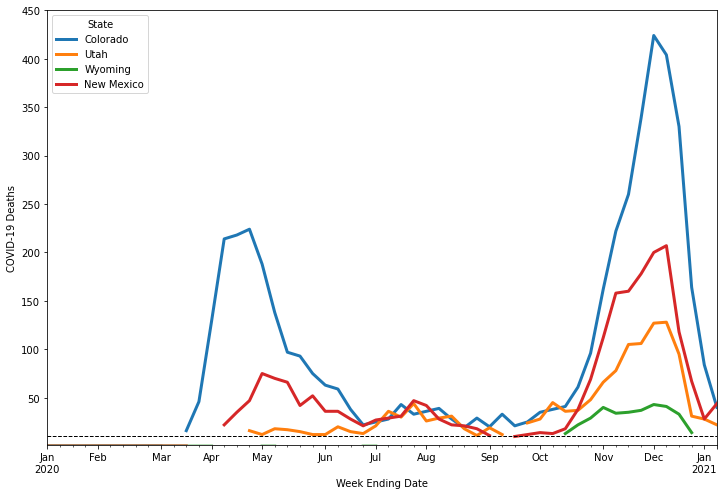

In [6]:
mountain_west_df = covid19_pivot_df.loc['2020-01-01':,['Colorado','Utah','Wyoming','New Mexico']]

f,ax = plt.subplots(figsize=(12,8))
mountain_west_df.plot(ax=ax,lw=3)
ax.set_ylim((1,450))
ax.set_ylabel('COVID-19 Deaths')
ax.legend(title='State',loc='upper left')
ax.axhline(10,c='k',ls='--',lw=1) # Suppressed counts

### The goal here is to make the death count into a death percentage. This will help accurately show the differences between the states even if they have larger population differences. This requires a new pivot table that we can use as the denominator for the COVID pivot table. 

In [7]:
allcause_pivot_df = pd.pivot_table(data = no_bad_rows_df,
                                  index = 'Week Ending Date',
                                  columns = 'Jurisdiction of Occurrence',
                                  values = 'All Cause'
                                 )

allcause_pivot_df.tail()

Jurisdiction of Occurrence,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Week Ending Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-12,1458.0,89.0,1755.0,860.0,7530.0,1222.0,285.0,184.0,151.0,4994.0,1795.0,208.0,364.0,3262.0,1875.0,890.0,826.0,1120.0,899.0,353.0,1329.0,1327.0,2843.0,1328.0,912.0,1755.0,278.0,465.0,830.0,309.0,1994.0,531.0,2616.0,70.0,215.0,3367.0,978.0,833.0,4112.0,119.0,252.0,1216.0,217.0,2059.0,5343.0,542.0,112.0,1716.0,1385.0,223.0,1535.0,139.0
2020-12-19,1274.0,56.0,1811.0,798.0,7299.0,1091.0,246.0,156.0,97.0,4625.0,1700.0,231.0,346.0,2896.0,1543.0,752.0,849.0,915.0,745.0,321.0,1310.0,1368.0,2503.0,1181.0,840.0,1493.0,210.0,391.0,698.0,281.0,1985.0,408.0,2723.0,68.0,170.0,2681.0,851.0,777.0,3953.0,128.0,194.0,984.0,118.0,1892.0,4819.0,489.0,115.0,1697.0,1299.0,146.0,1403.0,140.0
2020-12-26,1107.0,42.0,1497.0,619.0,6002.0,830.0,195.0,152.0,85.0,4018.0,1315.0,154.0,240.0,2171.0,845.0,619.0,607.0,765.0,635.0,326.0,1059.0,1287.0,1779.0,985.0,760.0,1162.0,166.0,299.0,559.0,336.0,1681.0,331.0,2777.0,52.0,120.0,1935.0,591.0,521.0,2938.0,61.0,151.0,682.0,102.0,1739.0,3597.0,361.0,101.0,1378.0,1056.0,69.0,1087.0,86.0
2021-01-02,1025.0,35.0,1328.0,544.0,5027.0,666.0,101.0,145.0,87.0,3896.0,1211.0,172.0,178.0,2015.0,266.0,347.0,516.0,623.0,572.0,275.0,985.0,1098.0,1403.0,745.0,692.0,1000.0,123.0,228.0,470.0,219.0,1548.0,236.0,1973.0,47.0,79.0,1441.0,338.0,451.0,2590.0,12.0,81.0,617.0,114.0,1449.0,3080.0,329.0,70.0,1272.0,877.0,44.0,900.0,76.0
2021-01-09,721.0,27.0,1176.0,487.0,3931.0,615.0,34.0,111.0,66.0,3214.0,840.0,154.0,102.0,1736.0,240.0,310.0,424.0,435.0,381.0,282.0,810.0,1049.0,1083.0,675.0,523.0,810.0,69.0,195.0,413.0,246.0,1373.0,193.0,1901.0,39.0,67.0,1085.0,NaN,318.0,2161.0,NaN,24.0,137.0,82.0,1288.0,2286.0,347.0,NaN,1083.0,818.0,14.0,810.0,61.0


### Now we divide the two dataframe pivot tables to create a death percentage and then plot the same line graph again. This shows us that the original line graph is lying in a way. If we were to take Colorado for example, we can see that in relation to the other states, the most recent peak is in line with the region, and not indicitive of something larger. 

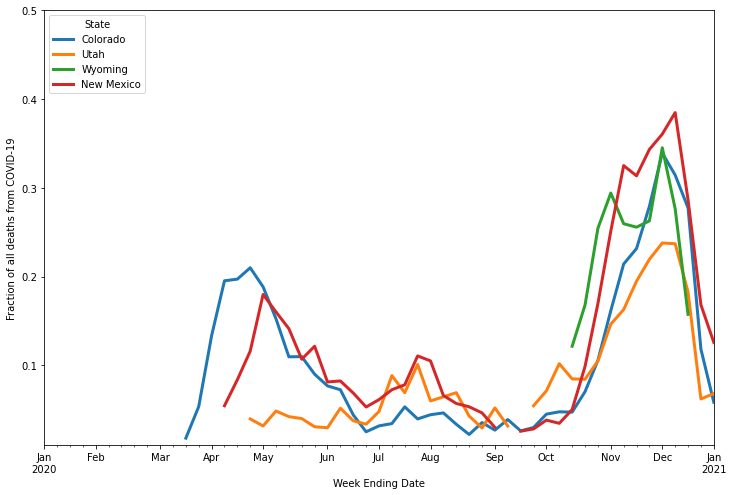

In [8]:
mountain_west_covid19_death_fraction = covid19_pivot_df/allcause_pivot_df
mountain_west_covid19_death_fraction = mountain_west_covid19_death_fraction.loc['2020-01-01':,['Colorado','Utah','Wyoming','New Mexico']]

f,ax = plt.subplots(figsize=(12,8))
mountain_west_covid19_death_fraction.plot(ax=ax,lw=3)
ax.set_ylim((.01,.5))
ax.set_ylabel('Fraction of all deaths from COVID-19')
ax.legend(title='State',loc='upper left')

### What if we want to do this for all? Let's create a bar chart! Here we are going to create a percentage for every state, like we did earlier for the Mountain West region. To make it cleaner, we will sort from greatest to least.

In [8]:
total_death_frac = covid19_pivot_df.loc['2020-01-01':].sum()/allcause_pivot_df.loc['2020-01-01':].sum()
total_death_frac.sort_values(ascending=False)

Jurisdiction of Occurrence
New Jersey              0.183587
North Dakota            0.151488
Connecticut             0.151409
Massachusetts           0.141877
South Dakota            0.140961
Rhode Island            0.133964
New York                0.131989
Iowa                    0.127914
Mississippi             0.122678
Texas                   0.119160
Illinois                0.118549
Louisiana               0.116919
District of Columbia    0.111899
Indiana                 0.111669
Arizona                 0.108852
Minnesota               0.107448
Pennsylvania            0.106557
Maryland                0.106115
Nebraska                0.103767
New Mexico              0.103474
Kansas                  0.101918
Nevada                  0.099795
Michigan                0.099055
Colorado                0.098031
Alabama                 0.097542
Arkansas                0.096859
Missouri                0.095819
Wisconsin               0.094384
Georgia                 0.093270
Oklahoma        

### Time to plot. We are creating a bar chart that will give us a readout for every state since Jan. 2020. This will show us what states have done worse, and can put the Mountain West states in context. 

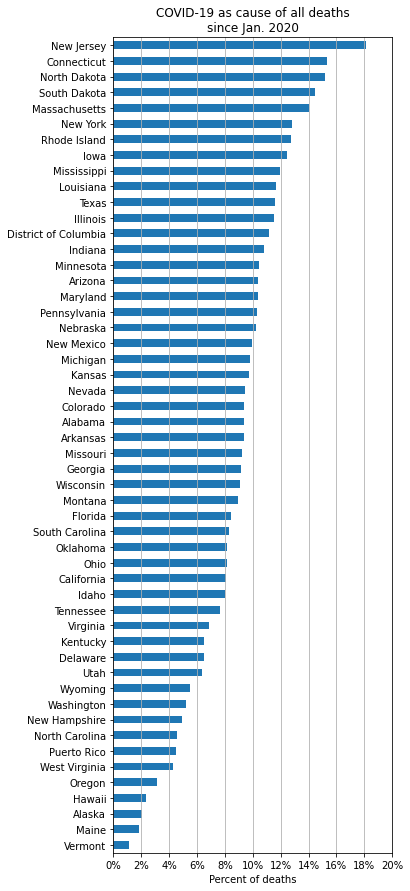

In [10]:
f,ax = plt.subplots(figsize=(5,15))
total_death_frac.sort_values().plot(kind='barh',ax=ax)
ax.set_ylabel(None)
ax.set_title('COVID-19 as cause of all deaths\nsince Jan. 2020')
ax.set_xlabel('Percent of deaths')
ax.set_xticks(np.arange(0,.21,.02))
ax.grid(axis='x')
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1,decimals=0))

# Conclusion:
### We have answered what we set out to do. We have shown that COVID-19 is causing a massive percentage of deaths compared to all causes and we have done it in such a way that makes it easy to understand. It puts COVID-19's damage into context which is ectremely important and it was shown in a way that does not sensationalize states that have a higher population. 

### Next: This could be improved with more data, and more accurate recording. The problem is that many deaths have underlying conditions which makes it harder to define, and can create leeway for misleading and false information about actual death rates. <a href="https://www.the-scientist.com/news-opinion/no-the-cdc-has-not-quietly-updated-covid-19-death-estimates-67902" target="_blank">Here</a> is an example of what can happen when sensationalism can take over.